In [5]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter

In [6]:
months = ['november2022', 'december2022', 'january2023', 'february2023', 'mars2023', 'april2023', 'may2023', 
          'june2023', 'july2023', 'august2023', 'september2023', 'october2023']
dataframes = {}

for month in months:
    # Define the file path
    file_path = '../data/listings/listings_' + month + '.csv.gz'
    # Use gzip.open to decompress the file and then read it with Pandas
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        data = pd.read_csv(file)

    dataframes[month] = data

C:\Users\heiwi\AppData\Local\Temp\ipykernel_15488\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_15488\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_15488\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_15488\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppData\Local\Temp\ipykernel_15488\2403487248.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\heiwi\AppDa

In [7]:
# Read training and test set
training_set = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

In [9]:
training_ids = training_set['id'].unique()
test_ids = test_set['id'].unique()

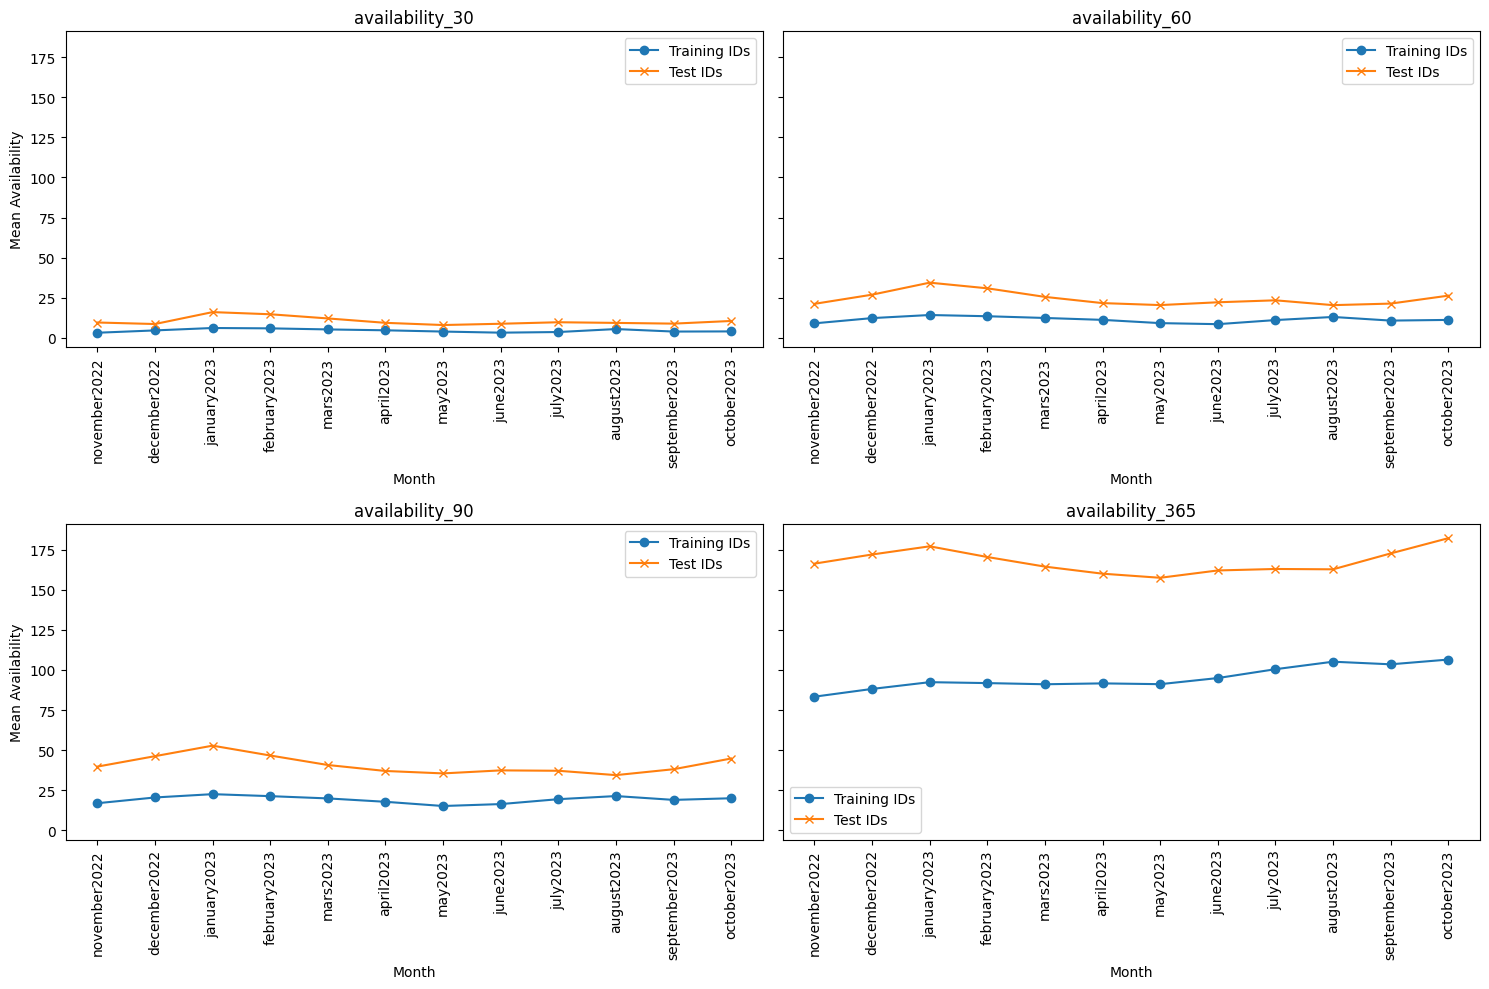

In [18]:
# To rotate the text on the x-axis by 90 degrees, we will update the code to include rotation in the xticks method.

# Define the availability columns we want to plot
availability_columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Adjusting the figure layout to have two rows with two plots each.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each availability column and plot the mean availability for training and test ids
for ax, column in zip(axes, availability_columns):
    training_means = []
    test_means = []

    # Loop through each month, calculate the mean availability for training and test ids
    for month in months:
        df = dataframes[month]
        training_means.append(df[df['id'].isin(training_ids)][column].mean())
        test_means.append(df[df['id'].isin(test_ids)][column].mean())

    # Plot the mean availabilities for the current availability column
    ax.plot(months, training_means, label='Training IDs', marker='o')
    ax.plot(months, test_means, label='Test IDs', marker='x')
    
    # Set the title of the subplot to the name of the availability column
    ax.set_title(column)
    ax.set_xlabel('Month')
    ax.legend()
    
    # Rotate the text on the x-axis by 90 degrees for better readability
    ax.set_xticks(np.arange(len(months)))
    ax.set_xticklabels(months, rotation=90)

# Set the y-label for the subplots in the first column (axes[0] and axes[2])
axes[0].set_ylabel('Mean Availability')
axes[2].set_ylabel('Mean Availability')

# Adjust the layout
plt.tight_layout()
plt.show()



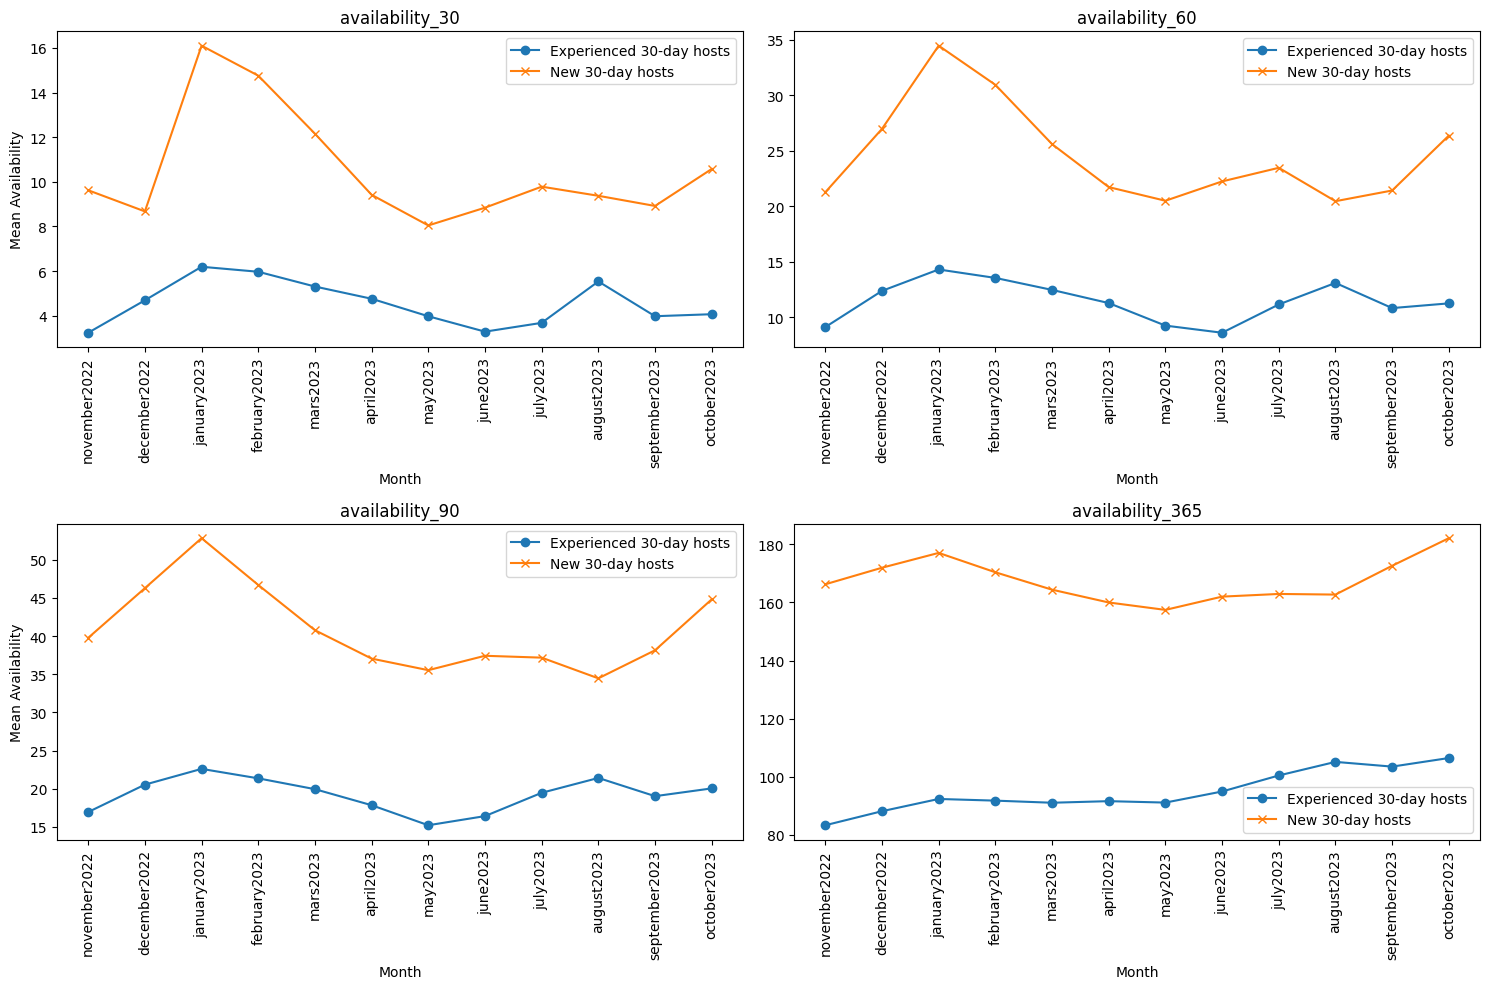

In [20]:
# To allow each subplot to have its own y-axis scale, we remove the sharey=True argument from subplots.
# We'll also include the rotation for the x-axis labels and remove the warning.

# Adjusting the figure layout to have two rows with two plots, each with its own y-axis scale.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each availability column and plot the mean availability for training and test ids
for ax, column in zip(axes, availability_columns):
    training_means = []
    test_means = []

    # Loop through each month, calculate the mean availability for training and test ids
    for month in months:
        df = dataframes[month]
        training_means.append(df[df['id'].isin(training_ids)][column].mean())
        test_means.append(df[df['id'].isin(test_ids)][column].mean())

    # Plot the mean availabilities for the current availability column
    ax.plot(months, training_means, label='Experienced 30-day hosts', marker='o')
    ax.plot(months, test_means, label='New 30-day hosts', marker='x')
    
    # Set the title of the subplot to the name of the availability column
    ax.set_title(column)
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(months)))
    ax.set_xticklabels(months, rotation=90)
    ax.legend()

# Set the y-label for the subplots in the first column (axes[0] and axes[2])
axes[0].set_ylabel('Mean Availability')
axes[2].set_ylabel('Mean Availability')

# Adjust the layout
plt.tight_layout()
plt.show()

In [22]:
# Loop through each DataFrame and add the new booking_rate columns based on the availability columns

for month in months:
    # For each availability column, calculate the booking rate and create a new column
    for days in [30, 60, 90, 365]:
        availability_column = f'availability_{days}'
        booking_rate_column = f'booking_rate_{days}'
        dataframes[month][booking_rate_column] = (days - dataframes[month][availability_column]) / days



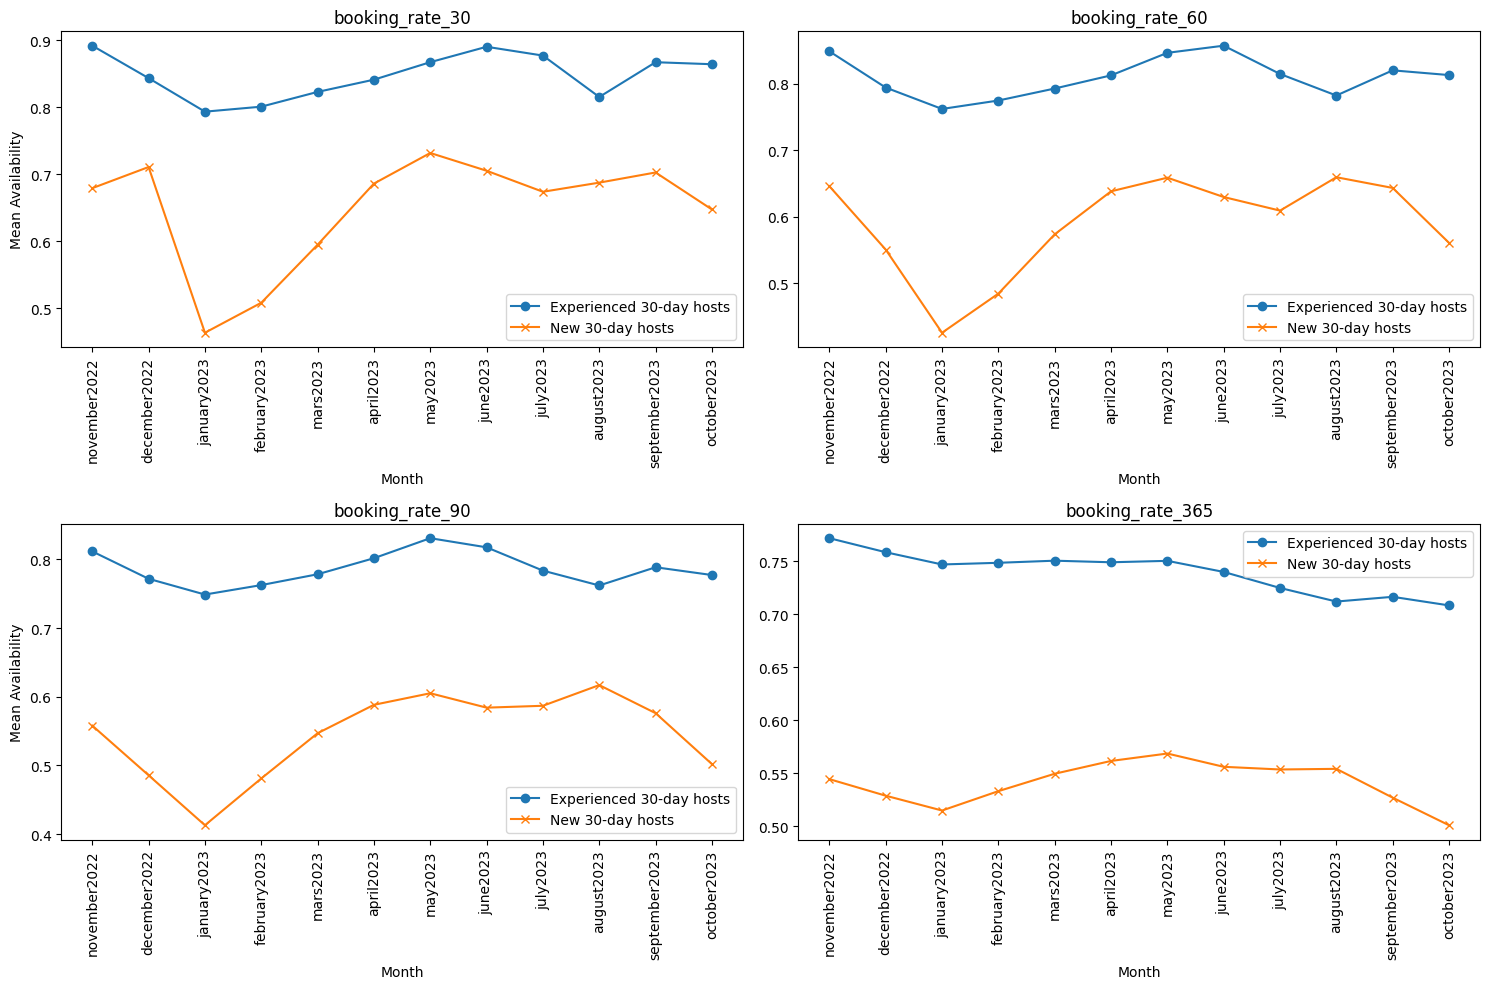

In [23]:
# To allow each subplot to have its own y-axis scale, we remove the sharey=True argument from subplots.
# We'll also include the rotation for the x-axis labels and remove the warning.

# Define the availability columns we want to plot
availability_columns = ['booking_rate_30', 'booking_rate_60', 'booking_rate_90', 'booking_rate_365']

# Adjusting the figure layout to have two rows with two plots, each with its own y-axis scale.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each availability column and plot the mean availability for training and test ids
for ax, column in zip(axes, availability_columns):
    training_means = []
    test_means = []

    # Loop through each month, calculate the mean availability for training and test ids
    for month in months:
        df = dataframes[month]
        training_means.append(df[df['id'].isin(training_ids)][column].mean())
        test_means.append(df[df['id'].isin(test_ids)][column].mean())

    # Plot the mean availabilities for the current availability column
    ax.plot(months, training_means, label='Experienced 30-day hosts', marker='o')
    ax.plot(months, test_means, label='New 30-day hosts', marker='x')
    
    # Set the title of the subplot to the name of the availability column
    ax.set_title(column)
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(months)))
    ax.set_xticklabels(months, rotation=90)
    ax.legend()

# Set the y-label for the subplots in the first column (axes[0] and axes[2])
axes[0].set_ylabel('Mean Booking Rate')
axes[2].set_ylabel('Mean Booking Rate')

# Adjust the layout
plt.tight_layout()
plt.show()

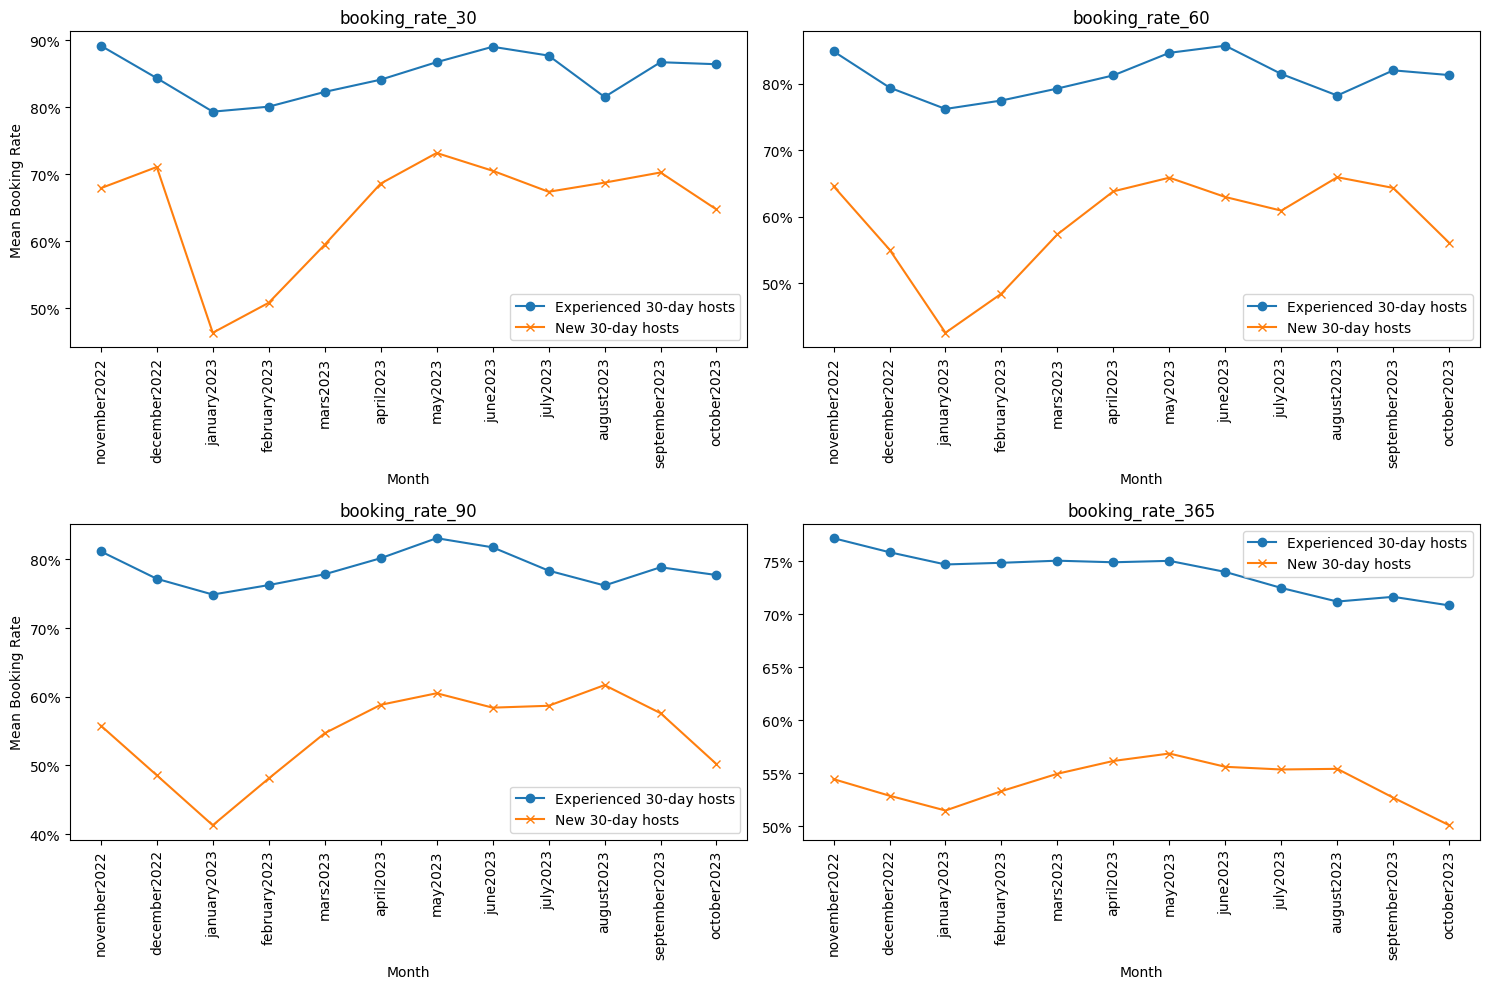

In [24]:
# To display the y-axis labels as integer percentages with a '%' sign, 
# we will modify the code to use the FuncFormatter.

# First, we need to import the FuncFormatter from the matplotlib.ticker module.
from matplotlib.ticker import FuncFormatter

# Define the availability columns we want to plot
availability_columns = ['booking_rate_30', 'booking_rate_60', 'booking_rate_90', 'booking_rate_365']

# Adjusting the figure layout to have two rows with two plots, each with its own y-axis scale.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each availability column and plot the mean availability for training and test ids
for ax, column in zip(axes, availability_columns):
    training_means = []
    test_means = []

    # Loop through each month, calculate the mean availability for training and test ids
    for month in months:
        df = dataframes[month]
        training_means.append(df[df['id'].isin(training_ids)][column].mean())
        test_means.append(df[df['id'].isin(test_ids)][column].mean())

    # Plot the mean availabilities for the current availability column
    ax.plot(months, training_means, label='Experienced 30-day hosts', marker='o')
    ax.plot(months, test_means, label='New 30-day hosts', marker='x')
    
    # Set the title of the subplot to the name of the availability column
    ax.set_title(column)
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(len(months)))
    ax.set_xticklabels(months, rotation=90)
    
    # Create the percentage formatter and apply it to the y-axis
    to_percent_formatter = FuncFormatter(lambda y, _: f'{int(y * 100)}%')
    ax.yaxis.set_major_formatter(to_percent_formatter)
    
    ax.legend()

# Set the y-label for the subplots in the first column (axes[0] and axes[2])
axes[0].set_ylabel('Mean Booking Rate')
axes[2].set_ylabel('Mean Booking Rate')

# Adjust the layout
plt.tight_layout()
plt.show()
